<a href="https://colab.research.google.com/github/vipinUTA/Projects/blob/master/Bank_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.4.0)


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

In [27]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [28]:
project_path = '/gdrive/My Drive/Colab Notebooks/'

In [29]:
dataset_file = project_path + 'bank.csv'

In [30]:
data = pd.read_csv(dataset_file)

In [31]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
data = data.drop("RowNumber", axis = 1)
data = data.drop("CustomerId", axis = 1)
data = data.drop("Surname", axis = 1)




In [33]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [36]:

def plot_corr(df, size=15):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

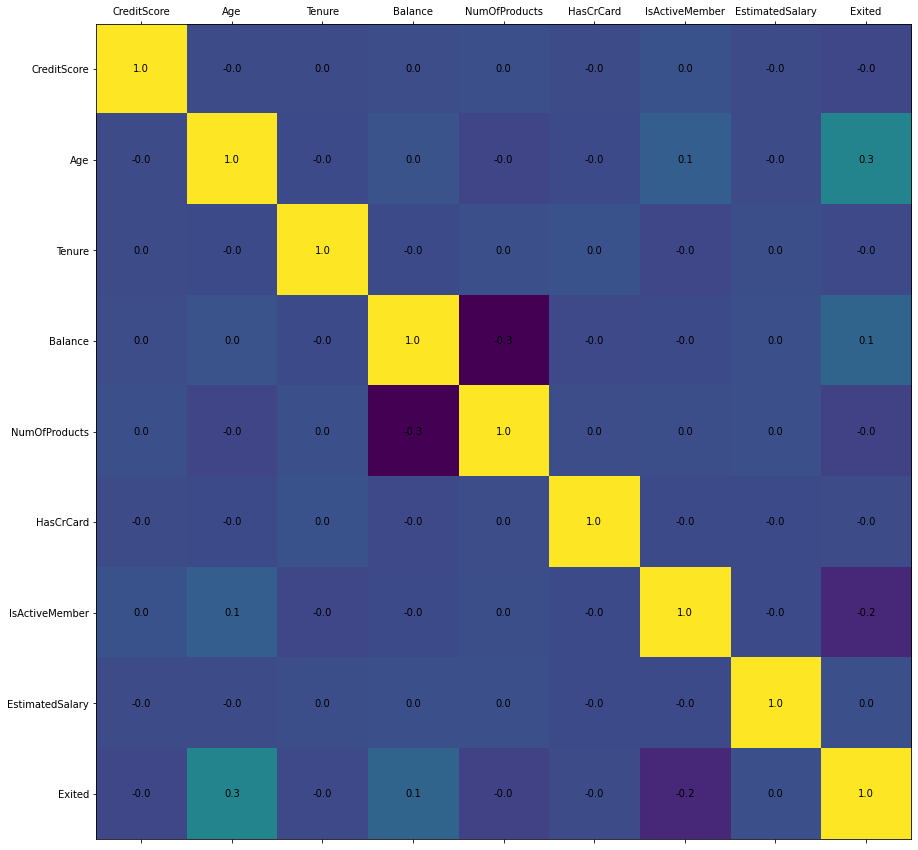

In [37]:
plot_corr(data)

In [38]:
data['Geography'].value_counts(True)

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

In [39]:
data['Gender'].value_counts(True)

Male      0.5457
Female    0.4543
Name: Gender, dtype: float64

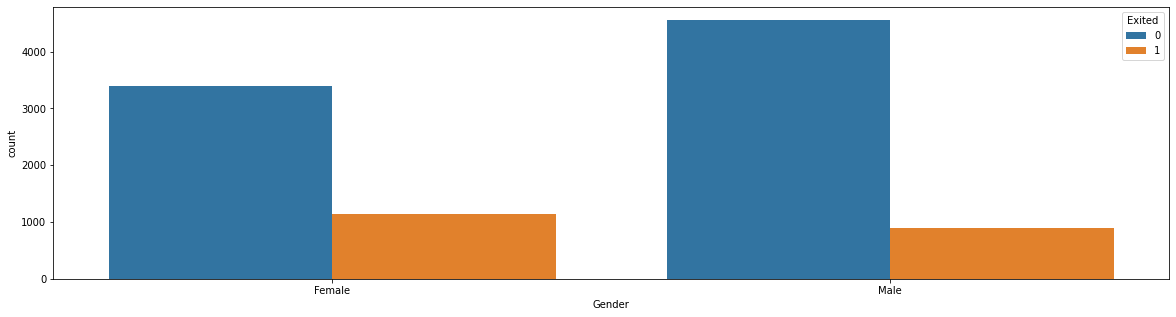

In [40]:
import seaborn as sns
plt.figure(figsize=(20,5))
sns.countplot(x=data['Gender'],hue=data['Exited'])

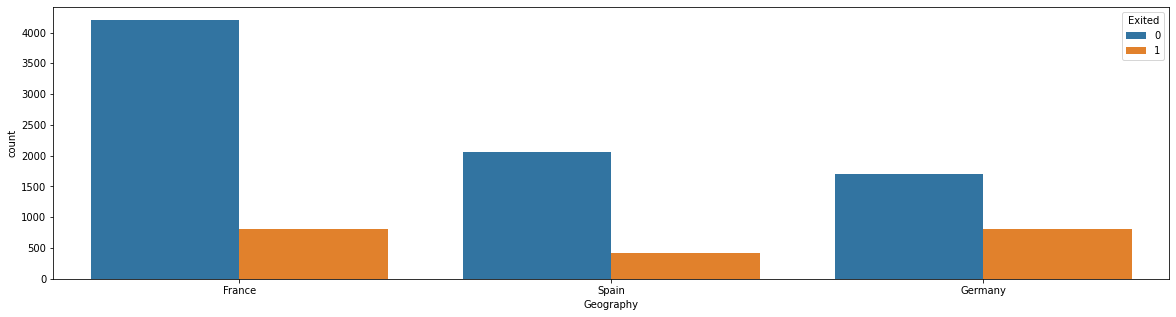

In [41]:
plt.figure(figsize=(20,5))
sns.countplot(x=data['Geography'],hue=data['Exited'])

In [42]:
# Contingency table

def get_contingency_table(df,Target,var):
    ct_res = pd.crosstab(df[var],df[Target],margins=True)
    ct_res["Exited (%)"]=round(ct_res[1]/ct_res['All']*100,2)
    return ct_res.drop(columns=["All"])


In [43]:
get_contingency_table(data,'Exited','Gender')

Exited,0,1,Exited (%)
Gender,,,
Female,3404,1139,25.07
Male,4559,898,16.46
All,7963,2037,20.37


In [44]:
get_contingency_table(data,'Exited','Geography')

Exited,0,1,Exited (%)
Geography,,,
France,4204,810,16.15
Germany,1695,814,32.44
Spain,2064,413,16.67
All,7963,2037,20.37


In [45]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
X = data.iloc[:, 0:9].values
y = data.iloc[:, 10].values
print(X[:10,:], '\n')
print(y[:10])

[[619 'France' 'Female' 42 2 0.0 1 1 1]
 [608 'Spain' 'Female' 41 1 83807.86 1 0 1]
 [502 'France' 'Female' 42 8 159660.8 3 1 0]
 [699 'France' 'Female' 39 1 0.0 2 0 0]
 [850 'Spain' 'Female' 43 2 125510.82 1 1 1]
 [645 'Spain' 'Male' 44 8 113755.78 2 1 0]
 [822 'France' 'Male' 50 7 0.0 2 1 1]
 [376 'Germany' 'Female' 29 4 115046.74 4 1 0]
 [501 'France' 'Male' 44 4 142051.07 2 0 1]
 [684 'France' 'Male' 27 2 134603.88 1 1 1]] 

[1 0 1 0 0 1 0 1 0 0]


In [47]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.compose import ColumnTransformer

label_encoder_x_1 = LabelEncoder()
X[: , 1] = label_encoder_x_1.fit_transform(X[:,1])


label_encoder_x_2 = LabelEncoder()
X[: , 2] = label_encoder_x_1.fit_transform(X[:,2])


 

In [48]:
 transformer = ColumnTransformer(
     transformers=[
         ("OneHot",        # Just a name
          OneHotEncoder(), # The transformer class
          [1,2]              # The column(s) to be applied on.
          )
    ],
     remainder='passthrough' # donot apply anything to the remaining columns
 )
 X = transformer.fit_transform(X.tolist())
 X = X.astype('float64')
 X = X[:, 1:]
 print(X[:10,:], '\n')
 print(y[:10])



[[0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 6.1900000e+02
  4.2000000e+01 2.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00
  1.0000000e+00]
 [0.0000000e+00 1.0000000e+00 1.0000000e+00 0.0000000e+00 6.0800000e+02
  4.1000000e+01 1.0000000e+00 8.3807860e+04 1.0000000e+00 0.0000000e+00
  1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 5.0200000e+02
  4.2000000e+01 8.0000000e+00 1.5966080e+05 3.0000000e+00 1.0000000e+00
  0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 6.9900000e+02
  3.9000000e+01 1.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 1.0000000e+00 0.0000000e+00 8.5000000e+02
  4.3000000e+01 2.0000000e+00 1.2551082e+05 1.0000000e+00 1.0000000e+00
  1.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00 6.4500000e+02
  4.4000000e+01 8.0000000e+00 1.1375578e+05 2.0000000e+00 1.0000000e+00
  0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.00

In [49]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
#Initialising the ANN - Defining as a sequence of layers
classifier = Sequential()

In [63]:
#Input Layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11 ))

In [64]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

In [65]:

classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [66]:
classifier.compile(optimizer = 'adam',loss= "binary_crossentropy",metrics=["accuracy"])

In [67]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100  )

Epoch 1/100
800/800 [==============================] - 1s 1ms/step - loss: 0.5759 - accuracy: 0.7920
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4332 - accuracy: 0.7906
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4281 - accuracy: 0.7964
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4293 - accuracy: 0.8058
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4122 - accuracy: 0.8225
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4070 - accuracy: 0.8245
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4125 - accuracy: 0.8261
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3934 - accuracy: 0.8362
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3975 - accuracy: 0.8381
Epoch 10/100
800/800 [==============================] - 1s 980us/step - loss: 0.3692 - accu

In [68]:
#Predicting the Test set results
y_pred = classifier.predict(X_test)
#Threshold of 50%
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [69]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1494,  101],
       [ 183,  222]])

In [70]:
accuracy = (1494+222)/(2000)
accuracy

0.858

In [61]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [71]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
     classifier = Sequential()
     classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
     classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
     classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
     classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
     return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],'epochs': [100, 500], 'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
param_grid = parameters, scoring = 'accuracy',cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/100
288/288 [==============================] - 1s 1ms/step - loss: 0.6417 - accuracy: 0.7963
Epoch 2/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4379 - accuracy: 0.7987
Epoch 3/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.7975
Epoch 4/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4408 - accuracy: 0.7898
Epoch 5/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4206 - accuracy: 0.8034
Epoch 6/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4178 - accuracy: 0.8012
Epoch 7/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4226 - accuracy: 0.8251
Epoch 8/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4091 - accuracy: 0.8257
Epoch 9/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4082 - accuracy: 0.8356
Epoch 10/100
288/288 [==============================] - 0s 1ms/step - loss: 0.4107 - accura

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Streaming output truncated to the last 5000 lines.
Epoch 1/500
225/225 [==============================] - 1s 1ms/step - loss: 0.6586 - accuracy: 0.7817
Epoch 2/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4822 - accuracy: 0.7966
Epoch 3/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.7984
Epoch 4/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4229 - accuracy: 0.8063
Epoch 5/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4312 - accuracy: 0.7886
Epoch 6/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4284 - accuracy: 0.7969
Epoch 7/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.7951
Epoch 8/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4217 - accuracy: 0.7998
Epoch 9/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.8195
Epoch 10/500
225/225 [==================

In [73]:
print(best_parameters)
print(best_accuracy)

{'batch_size': 25, 'epochs': 500, 'optimizer': 'rmsprop'}
0.8483750000000001
